# light gbm 데모
## 라이브러리 import 및 설정

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import lightgbm as lgb
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import warnings
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

## 학습데이터 로드

In [3]:
data_dir = Path('C:\\Users\\USER\\Desktop\\오픈소스SW설계\\단국대\\DataInput\\')
sub_dir = Path('C:\\Users\\USER\\Desktop\\오픈소스SW설계\\단국대\\sub\\')
feature_dir = Path('C:\\Users\\USER\\Desktop\\오픈소스SW설계\\단국대\\DataInput\\')

val_dir = Path('C:\\Users\\USER\\Desktop\\오픈소스SW설계\\단국대\\val')
tst_dir = Path('C:\\Users\\USER\\Desktop\\오픈소스SW설계\\단국대\\tst')

trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
sample_file = data_dir / 'sample_submission.csv'

target_col = 'class'
n_fold = 5
n_class = 3
seed = 42

In [4]:
algo_name = 'lgbcv'
feature_name = 'feature'
model_name = f'{algo_name}_{feature_name}'

feature_file = feature_dir / f'{feature_name}.csv'
p_val_file = val_dir / f'{model_name}.val.csv'
p_tst_file = tst_dir / f'{model_name}.tst.csv'
sub_file = sub_dir / f'{model_name}.csv'

df = pd.read_csv(feature_file, index_col=0)
print(df.shape)
#df.head()

(400000, 20)


In [5]:
y = df[target_col].values[:320000]
df.drop(target_col, axis=1, inplace=True)
trn = df.iloc[:320000].values
tst = df.iloc[320000:].values
feature_name = df.columns.tolist()
print(y.shape, trn.shape, tst.shape)

(320000,) (320000, 19) (80000, 19)


## Stratified K-Fold Cross Validation


In [6]:
cv = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)


## LightGBM 모델 학습


In [ ]:
p_val = np.zeros((trn.shape[0], n_class))
p_tst = np.zeros((tst.shape[0], n_class))
for i, (i_trn, i_val) in enumerate(cv.split(trn, y), 1):
    print(f'training model for CV #{i}')
    clf = lgb.LGBMClassifier(objective='multiclass',
                             n_estimators=1000,
                             num_leaves=100,
                             learning_rate=0.01,
                             min_child_samples=10,
                             subsample=.5,
                             subsample_freq=1,
                             colsample_bytree=.8,
                             random_state=seed,
                             n_jobs=-1)
    clf.fit(trn[i_trn], y[i_trn],
            eval_set=[(trn[i_val], y[i_val])],
            eval_metric='multiclass',
            early_stopping_rounds=10)
    
    p_val[i_val, :] = clf.predict_proba(trn[i_val])
    p_tst += clf.predict_proba(tst) / n_fold

training model for CV #1
[1]	valid_0's multi_logloss: 0.972489
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 0.959347
[3]	valid_0's multi_logloss: 0.945691
[4]	valid_0's multi_logloss: 0.93224
[5]	valid_0's multi_logloss: 0.919239
[6]	valid_0's multi_logloss: 0.908124
[7]	valid_0's multi_logloss: 0.896746
[8]	valid_0's multi_logloss: 0.886863
[9]	valid_0's multi_logloss: 0.87591
[10]	valid_0's multi_logloss: 0.864187
[11]	valid_0's multi_logloss: 0.85288
[12]	valid_0's multi_logloss: 0.841933
[13]	valid_0's multi_logloss: 0.831152
[14]	valid_0's multi_logloss: 0.820453
[15]	valid_0's multi_logloss: 0.810025
[16]	valid_0's multi_logloss: 0.800211
[17]	valid_0's multi_logloss: 0.790412
[18]	valid_0's multi_logloss: 0.780721
[19]	valid_0's multi_logloss: 0.771118
[20]	valid_0's multi_logloss: 0.7625
[21]	valid_0's multi_logloss: 0.753241
[22]	valid_0's multi_logloss: 0.744265
[23]	valid_0's multi_logloss: 0.735359
[24]	valid_0's multi_logloss: 0

[209]	valid_0's multi_logloss: 0.229865
[210]	valid_0's multi_logloss: 0.229349
[211]	valid_0's multi_logloss: 0.22865
[212]	valid_0's multi_logloss: 0.22804
[213]	valid_0's multi_logloss: 0.22738
[214]	valid_0's multi_logloss: 0.226739
[215]	valid_0's multi_logloss: 0.2261
[216]	valid_0's multi_logloss: 0.225419
[217]	valid_0's multi_logloss: 0.224859
[218]	valid_0's multi_logloss: 0.224248
[219]	valid_0's multi_logloss: 0.223725
[220]	valid_0's multi_logloss: 0.223108
[221]	valid_0's multi_logloss: 0.222573
[222]	valid_0's multi_logloss: 0.222108
[223]	valid_0's multi_logloss: 0.221558
[224]	valid_0's multi_logloss: 0.221058
[225]	valid_0's multi_logloss: 0.220517
[226]	valid_0's multi_logloss: 0.220002
[227]	valid_0's multi_logloss: 0.219544
[228]	valid_0's multi_logloss: 0.218957
[229]	valid_0's multi_logloss: 0.218489
[230]	valid_0's multi_logloss: 0.217931
[231]	valid_0's multi_logloss: 0.217425
[232]	valid_0's multi_logloss: 0.216901
[233]	valid_0's multi_logloss: 0.21644
[234]	

[414]	valid_0's multi_logloss: 0.173612
[415]	valid_0's multi_logloss: 0.17353
[416]	valid_0's multi_logloss: 0.173439
[417]	valid_0's multi_logloss: 0.173347
[418]	valid_0's multi_logloss: 0.173263
[419]	valid_0's multi_logloss: 0.173174
[420]	valid_0's multi_logloss: 0.173088
[421]	valid_0's multi_logloss: 0.17299
[422]	valid_0's multi_logloss: 0.172898
[423]	valid_0's multi_logloss: 0.172804
[424]	valid_0's multi_logloss: 0.172722
[425]	valid_0's multi_logloss: 0.172647
[426]	valid_0's multi_logloss: 0.172547
[427]	valid_0's multi_logloss: 0.172452
[428]	valid_0's multi_logloss: 0.172358
[429]	valid_0's multi_logloss: 0.17229
[430]	valid_0's multi_logloss: 0.172207
[431]	valid_0's multi_logloss: 0.172116
[432]	valid_0's multi_logloss: 0.172025
[433]	valid_0's multi_logloss: 0.171937
[434]	valid_0's multi_logloss: 0.171861
[435]	valid_0's multi_logloss: 0.171806
[436]	valid_0's multi_logloss: 0.171753
[437]	valid_0's multi_logloss: 0.171689
[438]	valid_0's multi_logloss: 0.171601
[43

[621]	valid_0's multi_logloss: 0.163834
[622]	valid_0's multi_logloss: 0.163806
[623]	valid_0's multi_logloss: 0.1638
[624]	valid_0's multi_logloss: 0.163777
[625]	valid_0's multi_logloss: 0.163761
[626]	valid_0's multi_logloss: 0.163736
[627]	valid_0's multi_logloss: 0.163711
[628]	valid_0's multi_logloss: 0.163691
[629]	valid_0's multi_logloss: 0.163674
[630]	valid_0's multi_logloss: 0.163646
[631]	valid_0's multi_logloss: 0.163627
[632]	valid_0's multi_logloss: 0.163611
[633]	valid_0's multi_logloss: 0.163583
[634]	valid_0's multi_logloss: 0.16356
[635]	valid_0's multi_logloss: 0.163531
[636]	valid_0's multi_logloss: 0.163514
[637]	valid_0's multi_logloss: 0.163492
[638]	valid_0's multi_logloss: 0.163469
[639]	valid_0's multi_logloss: 0.163452
[640]	valid_0's multi_logloss: 0.163434
[641]	valid_0's multi_logloss: 0.163408
[642]	valid_0's multi_logloss: 0.163389
[643]	valid_0's multi_logloss: 0.163372
[644]	valid_0's multi_logloss: 0.163356
[645]	valid_0's multi_logloss: 0.163339
[64

[828]	valid_0's multi_logloss: 0.161101
[829]	valid_0's multi_logloss: 0.161096
[830]	valid_0's multi_logloss: 0.161089
[831]	valid_0's multi_logloss: 0.161085
[832]	valid_0's multi_logloss: 0.161077
[833]	valid_0's multi_logloss: 0.161068
[834]	valid_0's multi_logloss: 0.161062
[835]	valid_0's multi_logloss: 0.161058
[836]	valid_0's multi_logloss: 0.161051
[837]	valid_0's multi_logloss: 0.161051
[838]	valid_0's multi_logloss: 0.161042
[839]	valid_0's multi_logloss: 0.161037
[840]	valid_0's multi_logloss: 0.161031
[841]	valid_0's multi_logloss: 0.161019
[842]	valid_0's multi_logloss: 0.161016
[843]	valid_0's multi_logloss: 0.161012
[844]	valid_0's multi_logloss: 0.161001
[845]	valid_0's multi_logloss: 0.160996
[846]	valid_0's multi_logloss: 0.160982
[847]	valid_0's multi_logloss: 0.160979
[848]	valid_0's multi_logloss: 0.160972
[849]	valid_0's multi_logloss: 0.160956
[850]	valid_0's multi_logloss: 0.160944
[851]	valid_0's multi_logloss: 0.160929
[852]	valid_0's multi_logloss: 0.160913


[31]	valid_0's multi_logloss: 0.673578
[32]	valid_0's multi_logloss: 0.666507
[33]	valid_0's multi_logloss: 0.659225
[34]	valid_0's multi_logloss: 0.652064
[35]	valid_0's multi_logloss: 0.644988
[36]	valid_0's multi_logloss: 0.638726
[37]	valid_0's multi_logloss: 0.631945
[38]	valid_0's multi_logloss: 0.625202
[39]	valid_0's multi_logloss: 0.619187
[40]	valid_0's multi_logloss: 0.612699
[41]	valid_0's multi_logloss: 0.606312
[42]	valid_0's multi_logloss: 0.600164
[43]	valid_0's multi_logloss: 0.594076
[44]	valid_0's multi_logloss: 0.588018
[45]	valid_0's multi_logloss: 0.582941
[46]	valid_0's multi_logloss: 0.577628
[47]	valid_0's multi_logloss: 0.571925
[48]	valid_0's multi_logloss: 0.566566
[49]	valid_0's multi_logloss: 0.561055
[50]	valid_0's multi_logloss: 0.556039
[51]	valid_0's multi_logloss: 0.550645
[52]	valid_0's multi_logloss: 0.546057
[53]	valid_0's multi_logloss: 0.54107
[54]	valid_0's multi_logloss: 0.536449
[55]	valid_0's multi_logloss: 0.532298
[56]	valid_0's multi_loglo

[239]	valid_0's multi_logloss: 0.21424
[240]	valid_0's multi_logloss: 0.21381
[241]	valid_0's multi_logloss: 0.2133
[242]	valid_0's multi_logloss: 0.212849
[243]	valid_0's multi_logloss: 0.21242
[244]	valid_0's multi_logloss: 0.211973
[245]	valid_0's multi_logloss: 0.211647
[246]	valid_0's multi_logloss: 0.211314
[247]	valid_0's multi_logloss: 0.210884
[248]	valid_0's multi_logloss: 0.210514
[249]	valid_0's multi_logloss: 0.210096
[250]	valid_0's multi_logloss: 0.209734
[251]	valid_0's multi_logloss: 0.20933
[252]	valid_0's multi_logloss: 0.208933
[253]	valid_0's multi_logloss: 0.208524
[254]	valid_0's multi_logloss: 0.208055
[255]	valid_0's multi_logloss: 0.207709
[256]	valid_0's multi_logloss: 0.207281
[257]	valid_0's multi_logloss: 0.206906
[258]	valid_0's multi_logloss: 0.206481
[259]	valid_0's multi_logloss: 0.206039
[260]	valid_0's multi_logloss: 0.205702
[261]	valid_0's multi_logloss: 0.205289
[262]	valid_0's multi_logloss: 0.204901
[263]	valid_0's multi_logloss: 0.204493
[264]	

[446]	valid_0's multi_logloss: 0.171674
[447]	valid_0's multi_logloss: 0.171599
[448]	valid_0's multi_logloss: 0.171524
[449]	valid_0's multi_logloss: 0.171441
[450]	valid_0's multi_logloss: 0.17135
[451]	valid_0's multi_logloss: 0.171267
[452]	valid_0's multi_logloss: 0.171169
[453]	valid_0's multi_logloss: 0.171092
[454]	valid_0's multi_logloss: 0.171026
[455]	valid_0's multi_logloss: 0.170962
[456]	valid_0's multi_logloss: 0.170892
[457]	valid_0's multi_logloss: 0.170808
[458]	valid_0's multi_logloss: 0.170724
[459]	valid_0's multi_logloss: 0.170656
[460]	valid_0's multi_logloss: 0.170604
[461]	valid_0's multi_logloss: 0.170539
[462]	valid_0's multi_logloss: 0.17047
[463]	valid_0's multi_logloss: 0.170416
[464]	valid_0's multi_logloss: 0.170348
[465]	valid_0's multi_logloss: 0.170272
[466]	valid_0's multi_logloss: 0.170191
[467]	valid_0's multi_logloss: 0.170123
[468]	valid_0's multi_logloss: 0.17005
[469]	valid_0's multi_logloss: 0.169995
[470]	valid_0's multi_logloss: 0.169937
[47

[652]	valid_0's multi_logloss: 0.163674
[653]	valid_0's multi_logloss: 0.163651
[654]	valid_0's multi_logloss: 0.163634
[655]	valid_0's multi_logloss: 0.163619
[656]	valid_0's multi_logloss: 0.163598
[657]	valid_0's multi_logloss: 0.163573
[658]	valid_0's multi_logloss: 0.163551
[659]	valid_0's multi_logloss: 0.163536
[660]	valid_0's multi_logloss: 0.163509
[661]	valid_0's multi_logloss: 0.163493
[662]	valid_0's multi_logloss: 0.163481
[663]	valid_0's multi_logloss: 0.163463
[664]	valid_0's multi_logloss: 0.163443
[665]	valid_0's multi_logloss: 0.163423
[666]	valid_0's multi_logloss: 0.163404
[667]	valid_0's multi_logloss: 0.163385
[668]	valid_0's multi_logloss: 0.163365
[669]	valid_0's multi_logloss: 0.163349
[670]	valid_0's multi_logloss: 0.163336
[671]	valid_0's multi_logloss: 0.163328
[672]	valid_0's multi_logloss: 0.163313
[673]	valid_0's multi_logloss: 0.163295
[674]	valid_0's multi_logloss: 0.16328
[675]	valid_0's multi_logloss: 0.163263
[676]	valid_0's multi_logloss: 0.163242
[

[859]	valid_0's multi_logloss: 0.161381
[860]	valid_0's multi_logloss: 0.161377
[861]	valid_0's multi_logloss: 0.161363
[862]	valid_0's multi_logloss: 0.161363
[863]	valid_0's multi_logloss: 0.161363
[864]	valid_0's multi_logloss: 0.161355
[865]	valid_0's multi_logloss: 0.161352
[866]	valid_0's multi_logloss: 0.161349
[867]	valid_0's multi_logloss: 0.161345
[868]	valid_0's multi_logloss: 0.161334
[869]	valid_0's multi_logloss: 0.161327
[870]	valid_0's multi_logloss: 0.161321
[871]	valid_0's multi_logloss: 0.16132
[872]	valid_0's multi_logloss: 0.161312
[873]	valid_0's multi_logloss: 0.161305
[874]	valid_0's multi_logloss: 0.161301
[875]	valid_0's multi_logloss: 0.161297
[876]	valid_0's multi_logloss: 0.161292
[877]	valid_0's multi_logloss: 0.161285
[878]	valid_0's multi_logloss: 0.161289
[879]	valid_0's multi_logloss: 0.161281
[880]	valid_0's multi_logloss: 0.161281
[881]	valid_0's multi_logloss: 0.161274
[882]	valid_0's multi_logloss: 0.161268
[883]	valid_0's multi_logloss: 0.161263
[

[63]	valid_0's multi_logloss: 0.49781
[64]	valid_0's multi_logloss: 0.493398
[65]	valid_0's multi_logloss: 0.489404
[66]	valid_0's multi_logloss: 0.4851
[67]	valid_0's multi_logloss: 0.480871
[68]	valid_0's multi_logloss: 0.476683
[69]	valid_0's multi_logloss: 0.472592
[70]	valid_0's multi_logloss: 0.468523
[71]	valid_0's multi_logloss: 0.465102
[72]	valid_0's multi_logloss: 0.46147
[73]	valid_0's multi_logloss: 0.458375
[74]	valid_0's multi_logloss: 0.455109
[75]	valid_0's multi_logloss: 0.451448
[76]	valid_0's multi_logloss: 0.447756
[77]	valid_0's multi_logloss: 0.444723
[78]	valid_0's multi_logloss: 0.441473
[79]	valid_0's multi_logloss: 0.437923
[80]	valid_0's multi_logloss: 0.434561
[81]	valid_0's multi_logloss: 0.431158
[82]	valid_0's multi_logloss: 0.427774
[83]	valid_0's multi_logloss: 0.424648
[84]	valid_0's multi_logloss: 0.421343
[85]	valid_0's multi_logloss: 0.41811
[86]	valid_0's multi_logloss: 0.414907
[87]	valid_0's multi_logloss: 0.412212
[88]	valid_0's multi_logloss: 

[271]	valid_0's multi_logloss: 0.202754
[272]	valid_0's multi_logloss: 0.202406
[273]	valid_0's multi_logloss: 0.202053
[274]	valid_0's multi_logloss: 0.201694
[275]	valid_0's multi_logloss: 0.201366
[276]	valid_0's multi_logloss: 0.201003
[277]	valid_0's multi_logloss: 0.200686
[278]	valid_0's multi_logloss: 0.200338
[279]	valid_0's multi_logloss: 0.199984
[280]	valid_0's multi_logloss: 0.199682
[281]	valid_0's multi_logloss: 0.19938
[282]	valid_0's multi_logloss: 0.199035
[283]	valid_0's multi_logloss: 0.198732
[284]	valid_0's multi_logloss: 0.198418
[285]	valid_0's multi_logloss: 0.198085
[286]	valid_0's multi_logloss: 0.197844
[287]	valid_0's multi_logloss: 0.197573
[288]	valid_0's multi_logloss: 0.197241
[289]	valid_0's multi_logloss: 0.196987
[290]	valid_0's multi_logloss: 0.196769
[291]	valid_0's multi_logloss: 0.1965
[292]	valid_0's multi_logloss: 0.196217
[293]	valid_0's multi_logloss: 0.195929
[294]	valid_0's multi_logloss: 0.19566
[295]	valid_0's multi_logloss: 0.195353
[296

[477]	valid_0's multi_logloss: 0.170568
[478]	valid_0's multi_logloss: 0.170506
[479]	valid_0's multi_logloss: 0.170436
[480]	valid_0's multi_logloss: 0.170382
[481]	valid_0's multi_logloss: 0.170326
[482]	valid_0's multi_logloss: 0.170276
[483]	valid_0's multi_logloss: 0.170225
[484]	valid_0's multi_logloss: 0.170168
[485]	valid_0's multi_logloss: 0.170103
[486]	valid_0's multi_logloss: 0.170055
[487]	valid_0's multi_logloss: 0.169995
[488]	valid_0's multi_logloss: 0.169943
[489]	valid_0's multi_logloss: 0.169882
[490]	valid_0's multi_logloss: 0.169825
[491]	valid_0's multi_logloss: 0.169774
[492]	valid_0's multi_logloss: 0.169736
[493]	valid_0's multi_logloss: 0.169682
[494]	valid_0's multi_logloss: 0.169624
[495]	valid_0's multi_logloss: 0.169568
[496]	valid_0's multi_logloss: 0.169521
[497]	valid_0's multi_logloss: 0.169476
[498]	valid_0's multi_logloss: 0.169438
[499]	valid_0's multi_logloss: 0.169393
[500]	valid_0's multi_logloss: 0.16933
[501]	valid_0's multi_logloss: 0.169265
[

[685]	valid_0's multi_logloss: 0.164134
[686]	valid_0's multi_logloss: 0.164115
[687]	valid_0's multi_logloss: 0.164099
[688]	valid_0's multi_logloss: 0.164084
[689]	valid_0's multi_logloss: 0.164069
[690]	valid_0's multi_logloss: 0.164048
[691]	valid_0's multi_logloss: 0.164037
[692]	valid_0's multi_logloss: 0.164017
[693]	valid_0's multi_logloss: 0.164003
[694]	valid_0's multi_logloss: 0.163995
[695]	valid_0's multi_logloss: 0.163988
[696]	valid_0's multi_logloss: 0.163968
[697]	valid_0's multi_logloss: 0.163952
[698]	valid_0's multi_logloss: 0.16394
[699]	valid_0's multi_logloss: 0.163931
[700]	valid_0's multi_logloss: 0.163919
[701]	valid_0's multi_logloss: 0.163901
[702]	valid_0's multi_logloss: 0.16389
[703]	valid_0's multi_logloss: 0.163874
[704]	valid_0's multi_logloss: 0.163858
[705]	valid_0's multi_logloss: 0.163845
[706]	valid_0's multi_logloss: 0.16383
[707]	valid_0's multi_logloss: 0.163819
[708]	valid_0's multi_logloss: 0.163798
[709]	valid_0's multi_logloss: 0.16379
[710

[892]	valid_0's multi_logloss: 0.162339
[893]	valid_0's multi_logloss: 0.162335
[894]	valid_0's multi_logloss: 0.162328
[895]	valid_0's multi_logloss: 0.162321
[896]	valid_0's multi_logloss: 0.162323
[897]	valid_0's multi_logloss: 0.162318
[898]	valid_0's multi_logloss: 0.162304
[899]	valid_0's multi_logloss: 0.162299
[900]	valid_0's multi_logloss: 0.162297
[901]	valid_0's multi_logloss: 0.162292
[902]	valid_0's multi_logloss: 0.162293
[903]	valid_0's multi_logloss: 0.162289
[904]	valid_0's multi_logloss: 0.162292
[905]	valid_0's multi_logloss: 0.162289
[906]	valid_0's multi_logloss: 0.162282
[907]	valid_0's multi_logloss: 0.16228
[908]	valid_0's multi_logloss: 0.162278
[909]	valid_0's multi_logloss: 0.162272
[910]	valid_0's multi_logloss: 0.162267
[911]	valid_0's multi_logloss: 0.162265
[912]	valid_0's multi_logloss: 0.162263
[913]	valid_0's multi_logloss: 0.162262
[914]	valid_0's multi_logloss: 0.162261
[915]	valid_0's multi_logloss: 0.162256
[916]	valid_0's multi_logloss: 0.162247
[

[96]	valid_0's multi_logloss: 0.387191
[97]	valid_0's multi_logloss: 0.384556
[98]	valid_0's multi_logloss: 0.381856
[99]	valid_0's multi_logloss: 0.379171
[100]	valid_0's multi_logloss: 0.376869
[101]	valid_0's multi_logloss: 0.374711
[102]	valid_0's multi_logloss: 0.372252
[103]	valid_0's multi_logloss: 0.36977
[104]	valid_0's multi_logloss: 0.367381
[105]	valid_0's multi_logloss: 0.364887
[106]	valid_0's multi_logloss: 0.363011
[107]	valid_0's multi_logloss: 0.360987
[108]	valid_0's multi_logloss: 0.358605
[109]	valid_0's multi_logloss: 0.356649
[110]	valid_0's multi_logloss: 0.354605
[111]	valid_0's multi_logloss: 0.352631
[112]	valid_0's multi_logloss: 0.3504
[113]	valid_0's multi_logloss: 0.348492
[114]	valid_0's multi_logloss: 0.346642
[115]	valid_0's multi_logloss: 0.34447
[116]	valid_0's multi_logloss: 0.342463
[117]	valid_0's multi_logloss: 0.340486
[118]	valid_0's multi_logloss: 0.338569
[119]	valid_0's multi_logloss: 0.336762
[120]	valid_0's multi_logloss: 0.334904
[121]	va

[302]	valid_0's multi_logloss: 0.193186
[303]	valid_0's multi_logloss: 0.192947
[304]	valid_0's multi_logloss: 0.192669
[305]	valid_0's multi_logloss: 0.192434
[306]	valid_0's multi_logloss: 0.1922
[307]	valid_0's multi_logloss: 0.191994
[308]	valid_0's multi_logloss: 0.19174
[309]	valid_0's multi_logloss: 0.191475
[310]	valid_0's multi_logloss: 0.191218
[311]	valid_0's multi_logloss: 0.190966
[312]	valid_0's multi_logloss: 0.190746
[313]	valid_0's multi_logloss: 0.190543
[314]	valid_0's multi_logloss: 0.190306
[315]	valid_0's multi_logloss: 0.190084
[316]	valid_0's multi_logloss: 0.18985
[317]	valid_0's multi_logloss: 0.189619
[318]	valid_0's multi_logloss: 0.189386
[319]	valid_0's multi_logloss: 0.189232
[320]	valid_0's multi_logloss: 0.189013
[321]	valid_0's multi_logloss: 0.188796
[322]	valid_0's multi_logloss: 0.188564
[323]	valid_0's multi_logloss: 0.188334
[324]	valid_0's multi_logloss: 0.188117
[325]	valid_0's multi_logloss: 0.187895
[326]	valid_0's multi_logloss: 0.187685
[327

In [ ]:
print(f'{accuracy_score(y, np.argmax(p_val, axis=1)) * 100:.4f}%')

In [8]:
print(p_val.shape, p_tst.shape)

(320000, 3) (80000, 3)


In [9]:
np.savetxt(p_val_file, p_val, fmt='%.6f', delimiter=',')
np.savetxt(p_tst_file, p_tst, fmt='%.6f', delimiter=',')

## 피처 중요도 시각화

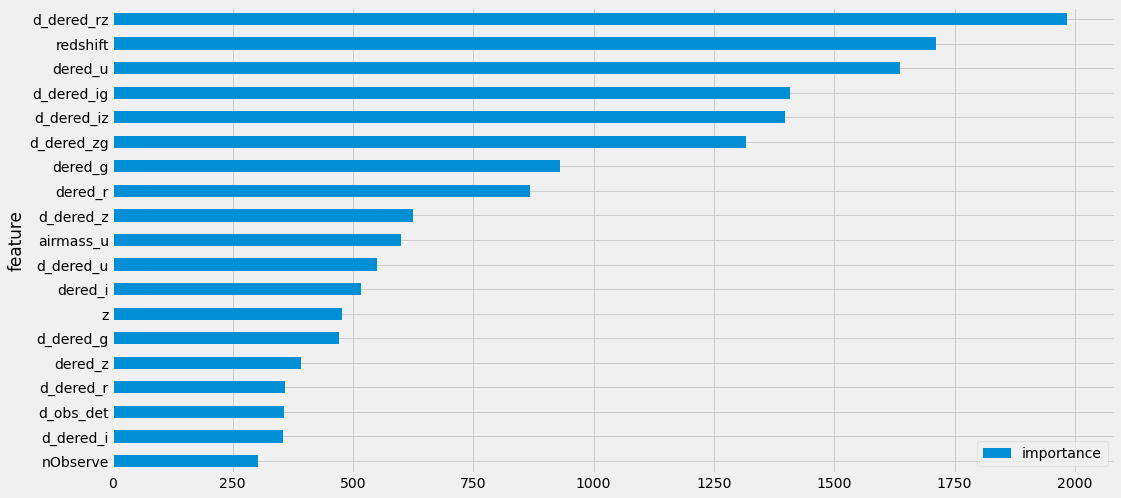

In [10]:
imp = pd.DataFrame({'feature': df.columns, 'importance': clf.feature_importances_})
imp = imp.sort_values('importance').set_index('feature')
imp.plot(kind='barh')

## 제출 파일 생성


In [11]:
sub = pd.read_csv(sample_file, index_col=0)
print(sub.shape)
sub.head()

(80000, 1)


,class
id,
320000,0
320001,0
320002,0
320003,0
320004,0


In [12]:
sub[target_col] = np.argmax(p_tst, axis=1)
sub.head()

,class
id,
320000,2
320001,0
320002,2
320003,0
320004,2


In [13]:
sub[target_col].value_counts()

2    41183
0    29969
1     8848
Name: class, dtype: int64

In [14]:
sub.to_csv(sub_file)